# DSA Design a Hash Table

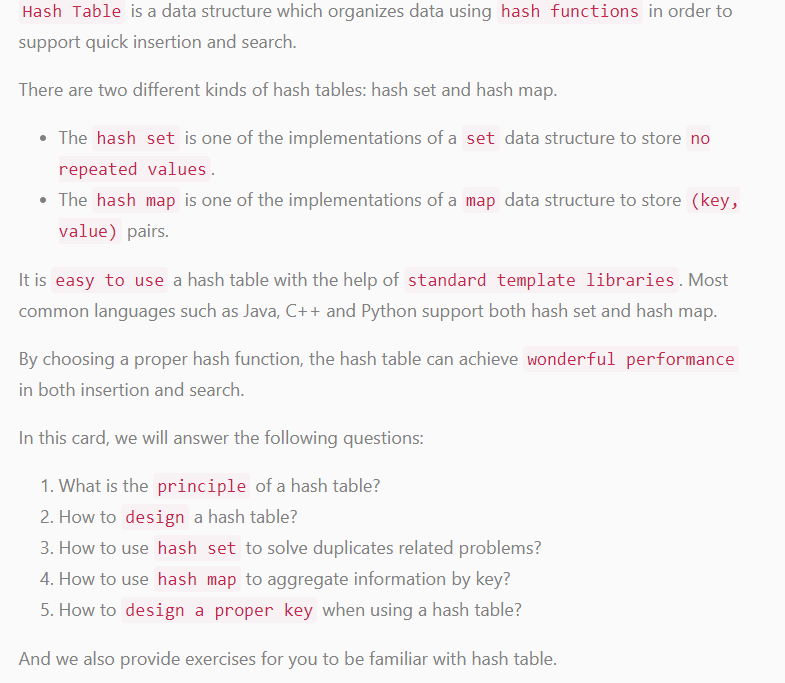

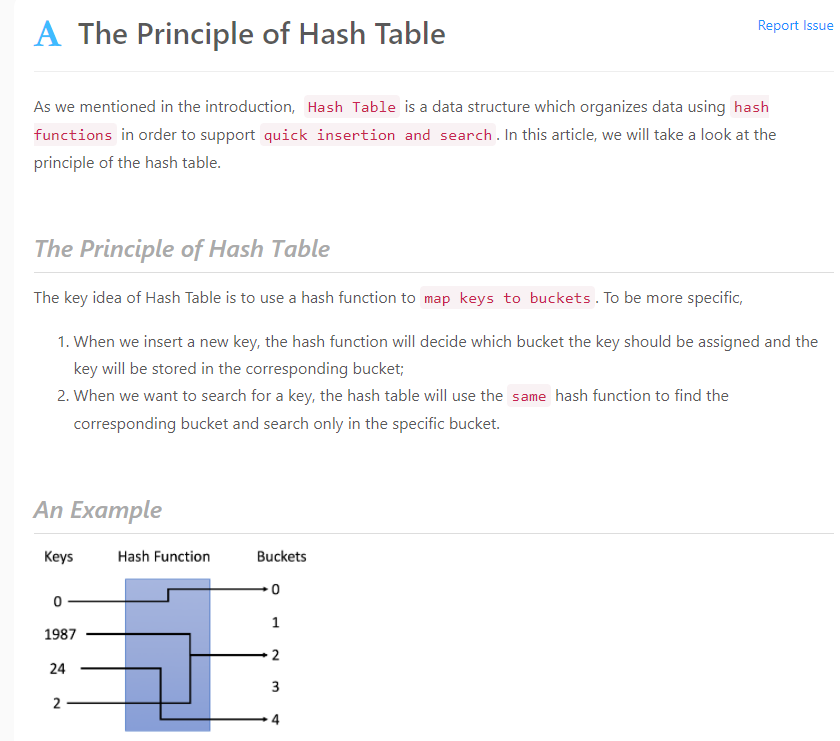

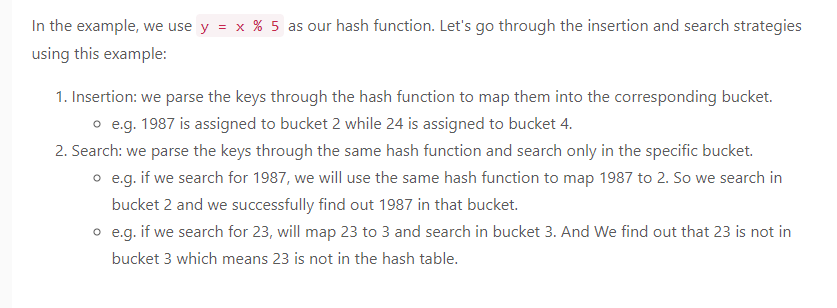

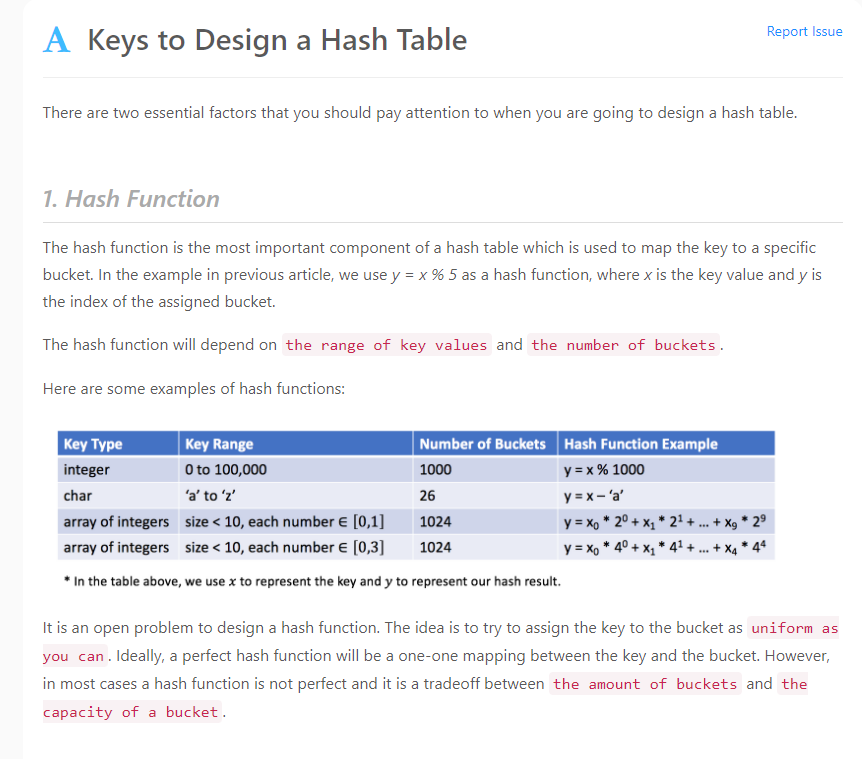

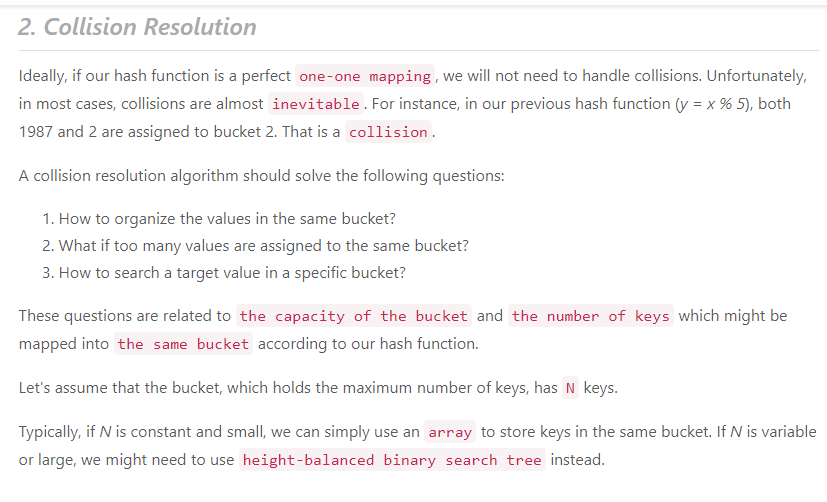

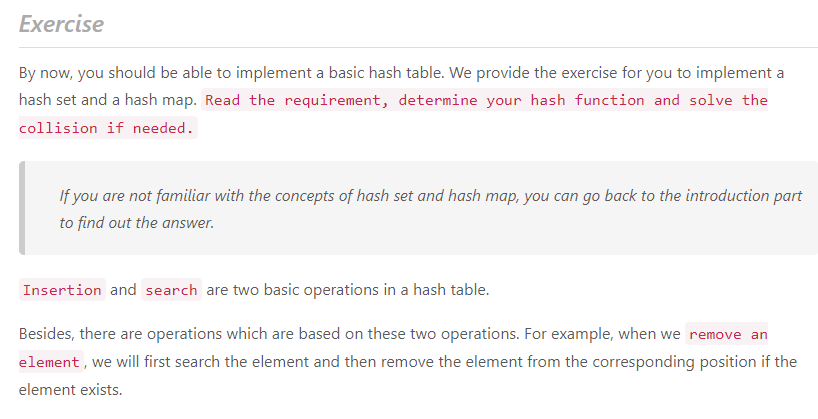

### Solutions

In [ ]:
import ipdb
bp = ipdb.set_trace

class MyHashSet:

    def __init__(self):
        self.hash_set = []

    def add(self, key: int) -> None:
        if not key in self.hash_set:
            self.hash_set.append(key)

    def remove(self, key: int) -> None:
        if key in self.hash_set:
            self.hash_set.remove(key)

    def contains(self, key: int) -> bool:
        return key in self.hash_set
        


# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)

### Your Answer

In [20]:
# Linked Node as Bucket
class Node:
    def __init__(self, value):
        self.next = None
        self.value = value

class Bucket:
    def __init__(self):
        self.head = None
    
    def contains(self, key):
        node = self.head
        while node:
            if node.value == key:
                return True
            else:
                node = node.next

        return False
    
    def update(self, key):
        if not self.head:
            self.head = Node(key)
        else:
            node = self.head
            while node:
                if node.value == key:
                    break
                else:
                    if node.next:
                        node = node.next
                    else:
                        node.next = Node(key)
                        break
    
    def delete(self, key):
        if not self.head:
            return
        else:
            pre = None
            node = self.head
            while node:
                if node.value == key:
                    if pre:
                        pre.next = node.next
                    else:
                        self.head = node.next
                        
                    break
                else:
                    pre = node
                    node = node.next
                    


class MyHashSet(object):

    def __init__(self):
        self.mod = 769
        self.hash_bucket = [Bucket() for i in range(self.mod)]

    def _get_hash_key(self, key):
        return key % self.mod
        
        
    def add(self, key):
        hash_key = self._get_hash_key(key)
        self.hash_bucket[hash_key].update(key)

    def remove(self, key):
        hash_key = self._get_hash_key(key)
        self.hash_bucket[hash_key].delete(key)

    def contains(self, key):
        hash_key = self._get_hash_key(key)
        return self.hash_bucket[hash_key].contains(key)

In [36]:
# BST as bucket
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None 
        
class BSTree:
    def __init__(self):
        self.root = None
    
    def searchBST(self, root, val): 
        if root is None or root.val == val:
            return root
        return (self.searchBST(root.left, val) if val < root.val
                   else self.searchBST(root.right, val)) 
    
    def insertIntoBST(self, root, val):
        if root is None:
            return TreeNode(val)
        
        elif root.val == val:
            return root
        
        elif root.val > val:
            root.left = self.insertIntoBST(root.left, val)
            return root
        
        elif root.val < val:
            root.right = self.insertIntoBST(root.right, val)
            return root
        
        
    def successor_val(self, root):
        root = root.right
        while root.left:
            root = root.left
        return root.val
        
        
    def predecessor_val(self, root):
        root = root.left
        while root.right:
            root = root.right
        return root.val
        
        
        
    def deleteNode(self, root, val):
        if root is None:
            return root
        
        if val > root.val:
            root.right = self.deleteNode(root.right, val)
        elif val < root.val:
            root.left = self.deleteNode(root.left, val)
        else:
            if not (root.left or root.right):
                root = None
            elif root.right:
                root.val = self.successor_val(root)
                root.right = self.deleteNode(root.right, root.val)
            else:
                root.val = self.predecessor_val(root)
                root.left = self.deleteNode(root.left, root.val)
                
        return root
        
        

class Bucket:
    def __init__(self):
        self.tree = BSTree()

    def update(self, key):
        self.tree.root = self.tree.insertIntoBST(self.tree.root, key)
    
    def delete(self, key):
        self.tree.root = self.tree.deleteNode(self.tree.root, key)
    
    def contains(self, key):
        if self.tree.searchBST(self.tree.root, key):
            return True
        else:
            return False
    


class MyHashSet(object):

    def __init__(self):
        self.mod = 769
        self.hash_bucket = [Bucket() for i in range(self.mod)]

    def _get_hash_key(self, key):
        return key % self.mod
        
        
    def add(self, key):
        hash_key = self._get_hash_key(key)
        self.hash_bucket[hash_key].update(key)

    def remove(self, key):
        hash_key = self._get_hash_key(key)
        self.hash_bucket[hash_key].delete(key)

    def contains(self, key):
        hash_key = self._get_hash_key(key)
        return self.hash_bucket[hash_key].contains(key)

In [37]:
my_hash_set = MyHashSet()
my_hash_set.add(2070)
my_hash_set.add(3458)
my_hash_set.add(2357)
print(my_hash_set.contains(1))
print(my_hash_set.contains(2070))
my_hash_set.remove(0)
my_hash_set.remove(3458)
print(my_hash_set.contains(3458))
print(my_hash_set.contains(2357))

False
True
False
True


https://leetcode.com/problems/design-hashset/solution/

#### Approach 1: LinkedList as Bucket
```python

class MyHashSet(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.keyRange = 769
        self.bucketArray = [Bucket() for i in range(self.keyRange)]

    def _hash(self, key):
        return key % self.keyRange

    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].insert(key)

    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].delete(key)

    def contains(self, key):
        """
        Returns true if this set contains the specified element
        :type key: int
        :rtype: bool
        """
        bucketIndex = self._hash(key)
        return self.bucketArray[bucketIndex].exists(key)


class Node:
    def __init__(self, value, nextNode=None):
        self.value = value
        self.next = nextNode

class Bucket:
    def __init__(self):
        # a pseudo head
        self.head = Node(0)

    def insert(self, newValue):
        # if not existed, add the new element to the head.
        if not self.exists(newValue):
            newNode = Node(newValue, self.head.next)
            # set the new head.
            self.head.next = newNode

    def delete(self, value):
        prev = self.head
        curr = self.head.next
        while curr is not None:
            if curr.value == value:
                # remove the current node
                prev.next = curr.next
                return
            prev = curr
            curr = curr.next

    def exists(self, value):
        curr = self.head.next
        while curr is not None:
            if curr.value == value:
                # value existed already, do nothing
                return True
            curr = curr.next
        return False


# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)
```

#### Approach 2: Binary Search Tree (BST) as Bucket
```python
class MyHashSet:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.keyRange = 769
        self.bucketArray = [Bucket() for i in range(self.keyRange)]

    def _hash(self, key) -> int:
        return key % self.keyRange

    def add(self, key: int) -> None:
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].insert(key)

    def remove(self, key: int) -> None:
        """
        :type key: int
        :rtype: None
        """
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].delete(key)

    def contains(self, key: int) -> bool:
        """
        Returns true if this set contains the specified element
        :type key: int
        :rtype: bool
        """
        bucketIndex = self._hash(key)
        return self.bucketArray[bucketIndex].exists(key)

class Bucket:
    def __init__(self):
        self.tree = BSTree()

    def insert(self, value):
        self.tree.root = self.tree.insertIntoBST(self.tree.root, value)

    def delete(self, value):
        self.tree.root = self.tree.deleteNode(self.tree.root, value)

    def exists(self, value):
        return (self.tree.searchBST(self.tree.root, value) is not None)

class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

class BSTree:
    def __init__(self):
        self.root = None

    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        if root is None or val == root.val:
            return root

        return self.searchBST(root.left, val) if val < root.val \
            else self.searchBST(root.right, val)

    def insertIntoBST(self, root: TreeNode, val: int) -> TreeNode:
        if not root:
            return TreeNode(val)

        if val > root.val:
            # insert into the right subtree
            root.right = self.insertIntoBST(root.right, val)
        elif val == root.val:
            return root
        else:
            # insert into the left subtree
            root.left = self.insertIntoBST(root.left, val)
        return root

    def successor(self, root):
        """
        One step right and then always left
        """
        root = root.right
        while root.left:
            root = root.left
        return root.val

    def predecessor(self, root):
        """
        One step left and then always right
        """
        root = root.left
        while root.right:
            root = root.right
        return root.val

    def deleteNode(self, root: TreeNode, key: int) -> TreeNode:
        if not root:
            return None

        # delete from the right subtree
        if key > root.val:
            root.right = self.deleteNode(root.right, key)
        # delete from the left subtree
        elif key < root.val:
            root.left = self.deleteNode(root.left, key)
        # delete the current node
        else:
            # the node is a leaf
            if not (root.left or root.right):
                root = None
            # the node is not a leaf and has a right child
            elif root.right:
                root.val = self.successor(root)
                root.right = self.deleteNode(root.right, root.val)
            # the node is not a leaf, has no right child, and has a left child
            else:
                root.val = self.predecessor(root)
                root.left = self.deleteNode(root.left, root.val)

        return root

# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)

```

# HashMap

```python

class MyHashMap:

    def __init__(self):
        self.map = dict()

    def put(self, key: int, value: int) -> None:
        self.map[key] = value

    def get(self, key: int) -> int:
        return self.map.get(key, -1)

    def remove(self, key: int) -> None:
        if key in self.map:
            del self.map[key]


# Your MyHashMap object will be instantiated and called as such:
# obj = MyHashMap()
# obj.put(key,value)
# param_2 = obj.get(key)
# obj.remove(key)
```

### Solution

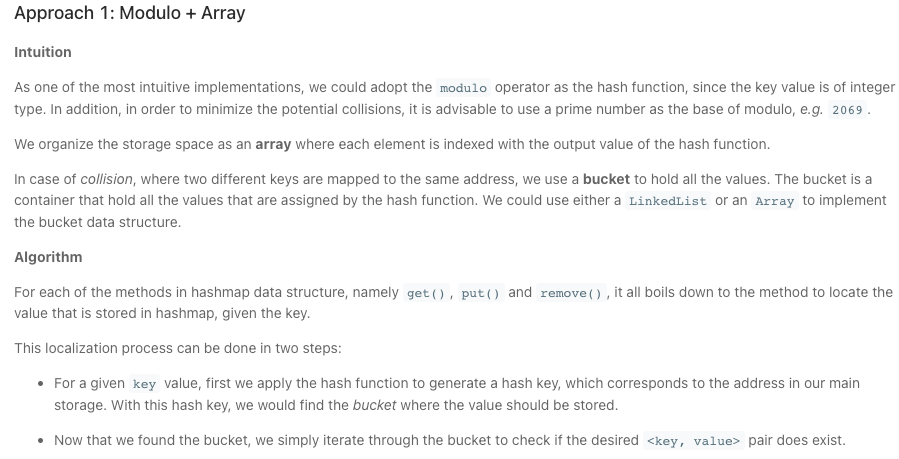

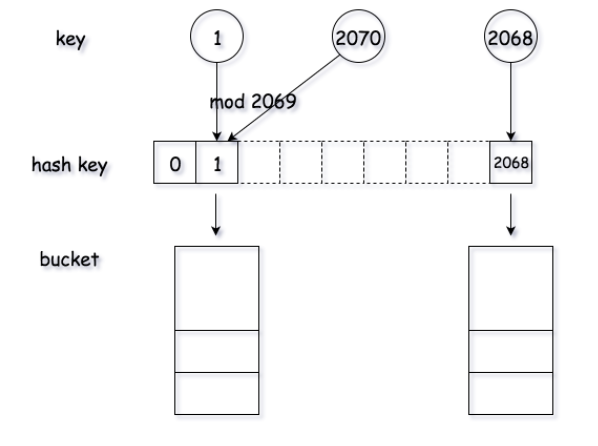

### Your Answer

In [4]:
class Bucket:
    def __init__(self):
        self.bucket = []

    def get(self, key):
        value = -1
        for i,kv in enumerate(self.bucket):
            if key == kv[0]:
                value = kv[1]
                break
        return value
    
    def update(self, key, value):
        found = False
        for i,kv in enumerate(self.bucket):
            
            if key == kv[0]:
                self.bucket[i] = (key, value)
                found = True
                break
            
        if not found:
            self.bucket.append((key, value))
            
        
    def delete(self, key):
        for i,kv in enumerate(self.bucket):
            if key == kv[0]:
                del self.bucket[i]
                break
        
        
class MyHashMap:

    def __init__(self):
        self.mod = 2069
        self.hash_bucket = [Bucket() for i in range(self.mod)]

    def put(self, key: int, value: int) -> None:
        hash_key = key % self.mod
        self.hash_bucket[hash_key].update(key,value)

    def get(self, key: int) -> int:
        hash_key = key % self.mod
        return self.hash_bucket[hash_key].get(key)

    def remove(self, key: int) -> None:
        hash_key = key % self.mod
        self.hash_bucket[hash_key].delete(key)



# Your MyHashMap object will be instantiated and called as such:
# obj = MyHashMap()
# obj.put(key,value)
# param_2 = obj.get(key)
# obj.remove(key)

In [7]:
my_hash_map = MyHashMap()
my_hash_map.put(2070,'tata')
my_hash_map.put(3458,'haha')
my_hash_map.put(2357,'baba')
print(my_hash_map.get(1))
print(my_hash_map.get(2070))
my_hash_map.remove(0)
my_hash_map.remove(3458)
print(my_hash_map.get(3458))
print(my_hash_map.get(2357))

None
(2070, 'tata')
None
(2357, 'baba')


In [ ]:
test

## Standard Answer

In [ ]:
class Bucket:
    def __init__(self):
        self.bucket = []

    def get(self, key):
        for (k, v) in self.bucket:
            if k == key:
                return v
        return -1

    def update(self, key, value):
        found = False
        for i, kv in enumerate(self.bucket):
            if key == kv[0]:
                self.bucket[i] = (key, value)
                found = True
                break

        if not found:
            self.bucket.append((key, value))

    def remove(self, key):
        for i, kv in enumerate(self.bucket):
            if key == kv[0]:
                del self.bucket[i]


class MyHashMap(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        # better to be a prime number, less collision
        self.key_space = 2069
        self.hash_table = [Bucket() for i in range(self.key_space)]


    def put(self, key, value):
        """
        value will always be non-negative.
        :type key: int
        :type value: int
        :rtype: None
        """
        hash_key = key % self.key_space
        self.hash_table[hash_key].update(key, value)
 

    def get(self, key):
        """
        Returns the value to which the specified key is mapped, or -1 if this map contains no mapping for the key
        :type key: int
        :rtype: int
        """
        hash_key = key % self.key_space
        return self.hash_table[hash_key].get(key)


    def remove(self, key):
        """
        Removes the mapping of the specified value key if this map contains a mapping for the key
        :type key: int
        :rtype: None
        """
        hash_key = key % self.key_space
        self.hash_table[hash_key].remove(key)

# Your MyHashMap object will be instantiated and called as such:
# obj = MyHashMap()
# obj.put(key,value)
# param_2 = obj.get(key)
# obj.remove(key)